# Import Statements

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.preprocessing import image
from tensorflow import data as tf_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Directory Setup

In [4]:
# Define image size and batch size
image_size = (224, 224)
batch_size = 10

# Define directories
train_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train'
test_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test'

# Create data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [5]:
print("Class Indices:", train_generator.class_indices)

Class Indices: {'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


# Model Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
train_augmentation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_augmentation = ImageDataGenerator(rescale=1/255)  # No augmentation for test data

# Load data from directories with augmentation
train_generator = train_augmentation.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_augmentation.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


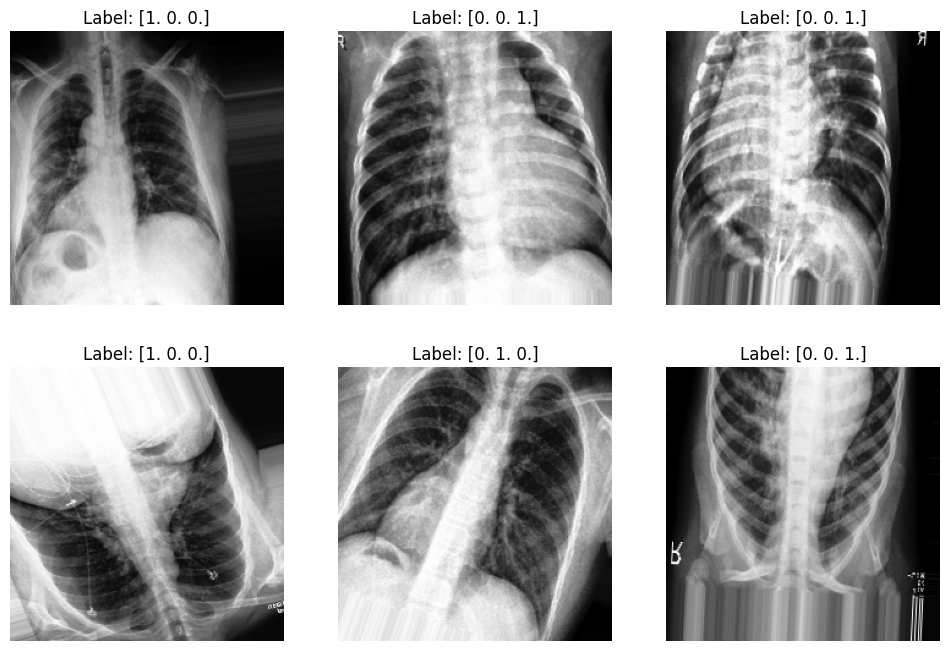

In [7]:
# Retrieve a batch of images and labels from the training generator
batch_images, batch_labels = next(train_generator)

# Plot only 6 images
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title('Label: ' + str(batch_labels[i]))
    plt.axis('off')
plt.show()

## Creating Augmented Model (Simple CNN)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

## Fitting Augmented Model

In [13]:
# Define number of epochs and steps per epoch
epochs = 8
steps_per_epoch = 3

# Fit the model with validation data
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,  # Provide validation data generator
    validation_steps=3  # Number of batches from the validation generator
)

/tmp/ipykernel_66/575276117.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/8


2024-04-26 20:37:16.443877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 0.8523 - accuracy: 0.5333

2024-04-26 20:37:21.008457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 6s 2s/step - loss: 0.8523 - accuracy: 0.5333 - val_loss: 0.5071 - val_accuracy: 0.6667
Epoch 2/8
3/3 [==============================] - 5s 2s/step - loss: 1.0532 - accuracy: 0.6000 - val_loss: 0.8849 - val_accuracy: 0.6667
Epoch 3/8
3/3 [==============================] - 5s 2s/step - loss: 0.7008 - accuracy: 0.7333 - val_loss: 0.7773 - val_accuracy: 0.5667
Epoch 4/8
3/3 [==============================] - 5s 2s/step - loss: 0.7244 - accuracy: 0.7667 - val_loss: 0.5546 - val_accuracy: 0.7333
Epoch 5/8
3/3 [==============================] - 5s 2s/step - loss: 0.6582 - accuracy: 0.7000 - val_loss: 0.5535 - val_accuracy: 0.7000
Epoch 6/8
3/3 [==============================] - 4s 2s/step - loss: 0.7624 - accuracy: 0.6333 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 7/8
3/3 [==============================] - 5s 2s/step - loss: 0.8660 - accuracy: 0.5667 - val_loss: 0.9448 - val_accuracy: 0.3667
Epoch 8/8
3/3 [==============================] - 5s 2s/ste

# Plotting Loss Curves

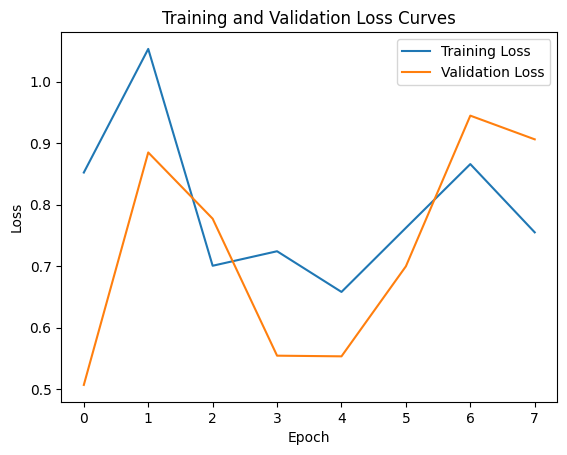

In [14]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

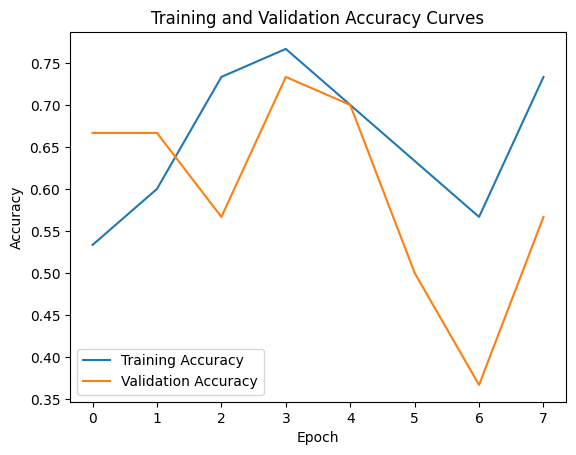

In [15]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()

# Saving Augmented Model

In [16]:
# Specify the file path where you want to save the model
model_path = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/AugmentedModel'

# Save the model
model.save(model_path)

print("Augmented Model saved successfully")

INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/AugmentedModel/assets


INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/AugmentedModel/assets


Augmented Model saved successfully
